# Random Forest

This notebook shows our model training by using random forest. Parameter search including: number of estimators, max depth, min_samples_split, min_samples_leaf, max_features.

Import the libraries:

In [12]:
import numpy as np 
import pandas as pd
import gc
import os
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from random import sample

## 1. Read Input

In [2]:
gc.enable()
df_train = pd.read_csv('train_P1.csv', dtype={'fullVisitorId': 'str'})
df_test = pd.read_csv('test_P1.csv', dtype={'fullVisitorId': 'str'})

In [3]:
df_trn, df_val = train_test_split(df_train, test_size=0.33, shuffle=False)

y_train = df_train['totals.transactionRevenue']
y_test = np.log1p(df_test['totals.transactionRevenue'].fillna(0))
y_trn = df_trn['totals.transactionRevenue']
y_val = df_val['totals.transactionRevenue']

Id_train = df_train['fullVisitorId']
Id_test  = df_test['fullVisitorId']
Id_trn = df_trn['fullVisitorId']
Id_val  = df_val['fullVisitorId']

X_train = df_train.drop(['fullVisitorId', 'totals.transactionRevenue'], axis=1)
X_test = df_test.drop(['fullVisitorId', 'totals.transactionRevenue'], axis=1)
X_trn = df_trn.drop(['fullVisitorId', 'totals.transactionRevenue'], axis=1)
X_val = df_val.drop(['fullVisitorId', 'totals.transactionRevenue'], axis=1)

del df_train
del df_test
del df_trn
del df_val

## 2. Train Random Forest model

In [4]:
X_trn, X_val, y_trn, y_val = train_test_split(X_train, y_train, test_size=0.33, shuffle=False)

In [5]:
List_n_estimators = np.arange(5,301,50)

for n_estimators in List_n_estimators:
    rf = RandomForestRegressor(n_estimators=n_estimators,
                            max_depth=14, 
                           max_features=0.6,
                           min_samples_leaf=100, 
                           min_samples_split=200,
                            n_jobs=-1,
                          random_state=42)
    
    rf.fit(X_trn, y_trn)
    yhat_trn = rf.predict(X_trn)
    yhat_val = rf.predict(X_val)

    print('n_estimators:{:5d} RMSE on train set:{:.6f}, val set:{:.6f}'.format(
        n_estimators, 
        np.sqrt(mean_squared_error(yhat_trn, y_trn)),
        np.sqrt(mean_squared_error(yhat_val, y_val)),
        ))

n_estimators:    5 RMSE on train set:1.622769, val set:1.395382
n_estimators:   55 RMSE on train set:1.612824, val set:1.380110
n_estimators:  105 RMSE on train set:1.612649, val set:1.379877
n_estimators:  155 RMSE on train set:1.612265, val set:1.379926
n_estimators:  205 RMSE on train set:1.612003, val set:1.379907
n_estimators:  255 RMSE on train set:1.611795, val set:1.379747


In [6]:
List_max_depth = np.arange(2,21,2)

for max_depth in List_max_depth:
    rf = RandomForestRegressor(n_estimators=50,
                            max_depth=max_depth, 
                           max_features=0.6,
                           min_samples_leaf=100, 
                           min_samples_split=200,
                            n_jobs=-1,
                          random_state=42)
    
    rf.fit(X_trn, y_trn)
    yhat_trn = rf.predict(X_trn)
    yhat_val = rf.predict(X_val)

    print('max_depth:{:5d} RMSE on train set:{:.6f}, val set:{:.6f}'.format(
        max_depth, 
        np.sqrt(mean_squared_error(yhat_trn, y_trn)),
        np.sqrt(mean_squared_error(yhat_val, y_val)),
        ))


max_depth:    2 RMSE on train set:1.774579, val set:1.473338
max_depth:    4 RMSE on train set:1.704117, val set:1.418833
max_depth:    6 RMSE on train set:1.672229, val set:1.395687
max_depth:    8 RMSE on train set:1.645586, val set:1.385174
max_depth:   10 RMSE on train set:1.624481, val set:1.380794
max_depth:   12 RMSE on train set:1.615426, val set:1.380637
max_depth:   14 RMSE on train set:1.612754, val set:1.380263
max_depth:   16 RMSE on train set:1.611392, val set:1.380419
max_depth:   18 RMSE on train set:1.612047, val set:1.380536
max_depth:   20 RMSE on train set:1.611848, val set:1.380508


In [7]:
List_min_samples_split = np.arange(50,201,50)

for min_samples_split in List_min_samples_split:
    rf = RandomForestRegressor(n_estimators=200,
                            max_depth=16, 
                           max_features=0.6,
                           min_samples_leaf=100, 
                           min_samples_split=min_samples_split,
                            n_jobs=-1,
                          random_state=42)
    
    rf.fit(X_trn, y_trn)
    yhat_trn = rf.predict(X_trn)
    yhat_val = rf.predict(X_val)

    print('min_samples_split:{:5d} RMSE on train set:{:.6f}, val set:{:.6f}'.format(
        min_samples_split, 
        np.sqrt(mean_squared_error(yhat_trn, y_trn)),
        np.sqrt(mean_squared_error(yhat_val, y_val)),
        ))


min_samples_split:   50 RMSE on train set:1.611560, val set:1.379996
min_samples_split:  100 RMSE on train set:1.611560, val set:1.379996
min_samples_split:  150 RMSE on train set:1.611560, val set:1.379996
min_samples_split:  200 RMSE on train set:1.611560, val set:1.379996


In [8]:
List_min_samples_leaf = np.arange(10,61,10)

for min_samples_leaf in List_min_samples_leaf:
    rf = RandomForestRegressor(n_estimators=200,
                            max_depth=16, 
                           max_features=0.6,
                           min_samples_leaf=min_samples_leaf, 
                           min_samples_split=200,
                            n_jobs=-1,
                          random_state=42)
    
    rf.fit(X_trn, y_trn)
    yhat_trn = rf.predict(X_trn)
    yhat_val = rf.predict(X_val)

    print('min_samples_leaf:{:5d} RMSE on train set:{:.6f}, val set:{:.6f}'.format(
        min_samples_leaf, 
        np.sqrt(mean_squared_error(yhat_trn, y_trn)),
        np.sqrt(mean_squared_error(yhat_val, y_val)),
        ))


min_samples_leaf:   10 RMSE on train set:1.585353, val set:1.378526
min_samples_leaf:   20 RMSE on train set:1.589786, val set:1.377965
min_samples_leaf:   30 RMSE on train set:1.593012, val set:1.377724
min_samples_leaf:   40 RMSE on train set:1.595818, val set:1.378153
min_samples_leaf:   50 RMSE on train set:1.598912, val set:1.377932
min_samples_leaf:   60 RMSE on train set:1.601428, val set:1.378817


In [13]:
List_max_features = np.arange(0.1, 1.1, 0.1)

for max_features in List_max_features:
    rf = RandomForestRegressor(n_estimators=200,
                            max_depth=16, 
                           max_features=max_features,
                           min_samples_leaf=50, 
                           min_samples_split=200,
                            n_jobs=-1,
                          random_state=42)
    
    rf.fit(X_trn, y_trn)
    yhat_trn = rf.predict(X_trn)
    yhat_val = rf.predict(X_val)

    print('max_features:{:.2f} RMSE on train set:{:.6f}, val set:{:.6f}'.format(
        max_features, 
        np.sqrt(mean_squared_error(yhat_trn, y_trn)),
        np.sqrt(mean_squared_error(yhat_val, y_val)),
        ))


max_features:0.10 RMSE on train set:1.679659, val set:1.394246
max_features:0.20 RMSE on train set:1.627270, val set:1.382678
max_features:0.30 RMSE on train set:1.612766, val set:1.378627
max_features:0.40 RMSE on train set:1.605835, val set:1.377430
max_features:0.50 RMSE on train set:1.601621, val set:1.377388
max_features:0.60 RMSE on train set:1.598912, val set:1.377932
max_features:0.70 RMSE on train set:1.596881, val set:1.379544
max_features:0.80 RMSE on train set:1.595514, val set:1.380006
max_features:0.90 RMSE on train set:1.595260, val set:1.380826
max_features:1.00 RMSE on train set:1.595051, val set:1.382179


## 3. Deploy the Final Model

In [14]:
rf = RandomForestRegressor(n_estimators=200,
                            max_depth=16, 
                           max_features=0.5,
                           min_samples_leaf=50, 
                           min_samples_split=200,
                            n_jobs=-1,
                          random_state=42)

rf.fit(X_trn, y_trn)
yhat_val=rf.predict(X_val)
rf.fit(X_train, y_train)
yhat_train=rf.predict(X_train)
yhat_test=rf.predict(X_test)
print('RMSE on \ntraining set::{:.6f}\nval set::{:.6f}\ntest set:{:.6f}'.format(np.sqrt(mean_squared_error(yhat_train, y_train)),
                                                                                np.sqrt(mean_squared_error(yhat_val, y_val)),
                                                               np.sqrt(mean_squared_error(yhat_test, y_test))))

RMSE on 
training set::1.515344
val set::1.377388
test set:1.377724


Plot feature importance:

                                              feature importance
totals.pageviews                                        0.370023
totals.hits                                             0.150729
totals.timeOnSite                                       0.096110
geoNetwork.country                                      0.078236
trafficSource.referralPath                              0.055412
visitNumber                                             0.053394
totals.sessionQualityDim                                0.051802
customDimensions.value                                  0.030537
month                                                   0.020926
geoNetwork.continent                                    0.013503
channelGrouping                                         0.010482
device.isMobile                                         0.008723
geoNetwork.region                                       0.008546
device.deviceCategory                                   0.007985
day                      

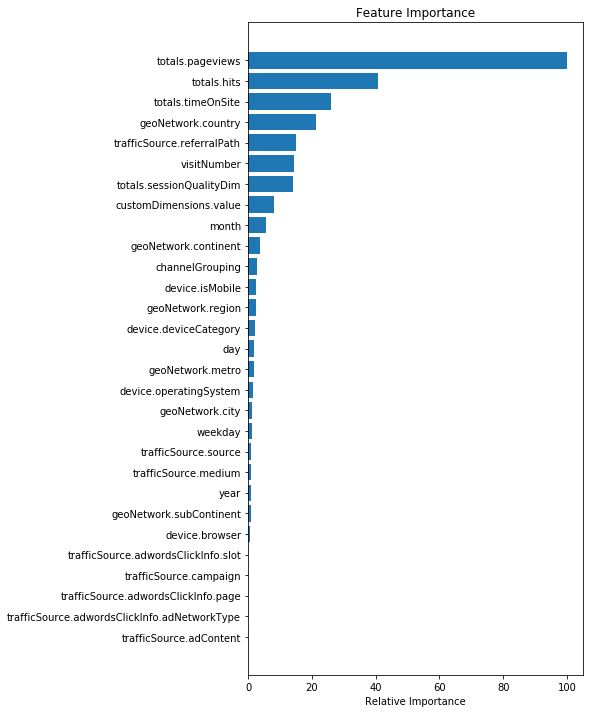

In [15]:
print(pd.DataFrame([rf.feature_importances_], columns = X_train.columns, index = ['feature importance']).transpose().sort_values(by='feature importance', ascending=False))

feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(6, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

Postprocessing:

In [16]:
def RMSE_group(Id, y, yhat, setName):
    df_final = pd.DataFrame({"fullVisitorId":Id})
    df_final['PredictedLogRevenue'] = np.expm1(yhat)

    df_final = df_final.groupby('fullVisitorId')['PredictedLogRevenue'].sum().reset_index()
    df_final.columns = ['fullVisitorId', 'PredictedLogRevenue']
    df_final['PredictedLogRevenue'] = np.log1p(df_final['PredictedLogRevenue'])
    
    
    df_true = pd.DataFrame({"fullVisitorId":Id})
    df_true['TrueLogRevenue'] = np.expm1(y)
        
    df_true = df_true.groupby('fullVisitorId')['TrueLogRevenue'].sum().reset_index()
    df_true.columns = ['fullVisitorId', 'TrueLogRevenue']
    df_true['TrueLogRevenue'] = np.log1p(df_true['TrueLogRevenue'])

    print('RMSE on ', setName, ' set:', 
      np.sqrt(mean_squared_error(df_final['PredictedLogRevenue'], df_true['TrueLogRevenue'])))

In [17]:
RMSE_group(Id_train, y_train, yhat_train, 'train')
RMSE_group(Id_val, y_val, yhat_val, 'validation')
RMSE_group(Id_test, y_test, yhat_test, 'test')

RMSE on  train  set: 1.513052851825421
RMSE on  validation  set: 1.4092570405159544
RMSE on  test  set: 1.4311106270914984
